In [1]:
import os
import codecs
import pandas as pd

os.chdir('../')

In [2]:

from scripts.dataset_downloader import initialize_dataset
from scripts.k_means import create_clsuters, clustering_errors
from scripts.helpers import get_most_rated_movies
import pandas as pd
dataset = 'ml-25m-subset(3)-#4.1'
#dataset = 'framework-ml-25m-subset'
#dataset_path = os.path.join('datasets', dataset)

In [3]:
# If dataset hasn't been previously initialized, it can be done with this function
#initialize_dataset(dataset)

In [4]:
os.getcwd()

'C:\\Users\\clari\\Desktop\\M2 - Thesis\\Research\\Dr Jacques Bou Abdo\\Recommender System\\5 - Ensemble Learning Model\\Accuracy Metrics\\serendipity-main'

In [5]:
import pandas as pd


In [6]:
genres_file = "datasets"


In [7]:
ratings_file =  "datasets"


In [8]:
genres_df = pd.read_csv(ratings_file+'/'+dataset+"/movies.csv")

In [9]:
#ratings_path = os.path.join(dataset_path, 'u.data')
#items_path = os.path.join(dataset_path, 'u.item')
#genres_path = os.path.join(dataset_path, 'u.genre')
#ratings_file = codecs.open(ratings_path, 'rU', 'UTF-8')
#items_file = codecs.open(items_path, 'rU', 'latin-1')
#THIS IS WRONG MANIPULATION ratings_df = pd.read_csv(ratings_file, names=['userId', 'itemId', 'rating', 'timestamp','title','movieId'])
#THIS IS WRONG MANIPULATION genres_df = pd.read_csv(genres_file, names=['title', 'id'])
# load data
#ratings_df = pd.read_csv(ratings_file, sep='\t', names=('user_id', 'item_id', 'rating', 'timestamp'))
#genres_df = pd.read_csv(genres_path, sep='|', names=('title', 'id'))
ratings_df = pd.read_csv(genres_file+'/'+dataset+"/clean/ratings.csv")
genres_df = pd.read_csv(ratings_file+'/'+dataset+"/movies.csv")#cols_names = ('movieId', 'title', 'year', 'link')


In [10]:
if '#2' in dataset:
    ratings_df = ratings_df[ratings_df['isNoisy'] == "[0.]"]
elif not 'framework' in dataset:
    ratings_df = ratings_df[ratings_df['isNoisy'] == 0]

cols_names = ('movieId', 'title')
#items_df = pd.read_csv(genres_file, usecols=list(range(0,24)), names=cols_names).drop(columns=['nan', 'link'])
#items_df = pd.read_csv(genres_file, names=cols_names)

#rat_movie = ratings_df.merge(genres_df, on)
if (('nf' in dataset) and (not('nf4' in dataset))) or (dataset == 'ml-25m-subset'):
    ratings_df = ratings_df.rename(columns={'itemId':'movieId'})
# dataset stats
ratings_df.head()
ratings_df = ratings_df.rename(columns={'itemId':'movieId'})

In [11]:
print(f"Total dataset users: {len(set(ratings_df.userId.to_list()))}")
print(f"Total dataset ratings: {len(ratings_df.userId.to_list())}")
print(f"Total movies: {len(set(ratings_df.movieId.to_list()))}")

Total dataset users: 5624
Total dataset ratings: 501991
Total movies: 17278


In [12]:
ratings_df.head()

,userId,movieId,rating,timestamp,genres_bin,isNoisy
0,107576,3253,4.5,1544828239,69793636673,0
1,116343,741,3.0,1106870586,221463938504,0
2,87441,18,4.0,1496483617,69793636673,0
3,92046,4378,4.0,1016643855,216359445792,0
4,137299,94896,4.0,1489231026,216359462241,0


In [13]:
ratings_df.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'genres_bin', 'isNoisy'], dtype='object')

In [14]:
ratings_df['rating'] = pd.to_numeric(ratings_df['rating'], errors='coerce')

In [15]:
ratings_df.dtypes

userId          int64
movieId         int64
rating        float64
timestamp       int64
genres_bin      int64
isNoisy         int64
dtype: object

In [16]:
ratings_df.head()

,userId,movieId,rating,timestamp,genres_bin,isNoisy
0,107576,3253,4.5,1544828239,69793636673,0
1,116343,741,3.0,1106870586,221463938504,0
2,87441,18,4.0,1496483617,69793636673,0
3,92046,4378,4.0,1016643855,216359445792,0
4,137299,94896,4.0,1489231026,216359462241,0


In [17]:
# Test to delete later on
# Sample DataFrame creation based on your provided data
data = {
    'userId': [83577, 83578],
    'movieId': [8334, 8335],
    'rating': [3.0, 4.0],
    'timestamp': [1113490895, 1113490900],
    'user_cat': ['Benevolent', 'Curious'],
    'rating_group': ['Su', 'Tu'],
    'item_cat': ['Strongly-preferred', 'Moderately-preferred'],
    'nf1': [0, 1],
    'title': ['Cowboys, The (1972)', 'Inception (2010)'],
    'genres': ['Western', 'Sci-Fi'],
    'user_group': ['LEUG', 'SEUG'],
    'nf2': [0, 1],
    'prediction': [None, None],
}

df = pd.DataFrame(data)

# Creating the pivot table with 'title' in the literal sense
pivot_table = pd.pivot_table(
    df, 
    index='userId',  # Set 'userId' as row labels
    columns='title',  # Use 'title' directly to get literal column names
    values='rating',  # Aggregate based on the 'rating' column
    aggfunc='mean'    # Use mean aggregation function
)

# Reset the column names to flatten them if needed
pivot_table.columns.name = None  # Remove multi-level index name

print(pivot_table)

        Cowboys, The (1972)  Inception (2010)
userId                                       
83577                   3.0               NaN
83578                   NaN               4.0


In [18]:
ratings_df.head()

,userId,movieId,rating,timestamp,genres_bin,isNoisy
0,107576,3253,4.5,1544828239,69793636673,0
1,116343,741,3.0,1106870586,221463938504,0
2,87441,18,4.0,1496483617,69793636673,0
3,92046,4378,4.0,1016643855,216359445792,0
4,137299,94896,4.0,1489231026,216359462241,0


In [19]:
genres_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [20]:
# merge the two tables then pivot so we have Users X Movies dataframe
#genres_df = genres_df.drop(['genres'], axis=1)
if 'title' in ratings_df.columns:
    ratings_title = ratings_df
else:
    ratings_title = pd.merge(ratings_df, genres_df, on=['movieId'])
#ratings_title = ratings_df.copy()
user_movie_ratings = pd.pivot_table(ratings_title,    index='userId',  # Set 'userId' as row labels
    columns='title',  # Use 'title' directly to get literal column names
    values='rating',  # Aggregate based on the 'rating' column
    aggfunc='mean'    # Use mean aggregation function)
                                   )

In [21]:
print(ratings_title.columns.tolist())

['userId', 'movieId', 'rating', 'timestamp', 'genres_bin', 'isNoisy', 'title', 'genres']


In [22]:
print(ratings_title.loc[:,'title'])

0                               Wayne's World (1992)
1         Ghost in the Shell (Kôkaku kidôtai) (1995)
2                                  Four Rooms (1995)
3                                  Sexy Beast (2000)
4                                      Bernie (2011)
                             ...                    
501986                      Haunted Honeymoon (1986)
501987                              GoldenEye (1995)
501988                  X-Men: The Last Stand (2006)
501989                          Groundhog Day (1993)
501990                                     Pi (1998)
Name: title, Length: 501991, dtype: object


In [23]:
user_movie_ratings.columns.name = None

In [24]:
user_movie_ratings.columns

Index(['"Great Performances" Cats (1998)', '#FollowMe (2019)',
       '#realityhigh (2017)', '$9.99 (2008)', ''71 (2014)',
       ''Hellboy': The Seeds of Creation (2004)', ''Round Midnight (1986)',
       ''Salem's Lot (2004)', ''Til There Was You (1997)',
       ''Twas the Night Before Christmas (1974)',
       ...
       'Обезьянки и грабители (1985)', 'Ограбление по... (1978)',
       'Одиноким предоставляется общежитие (1983)',
       'Пес Барбос и необычный кросс (1961)', 'Поздняя встреча (1979)',
       'Приключения Домовёнка (1986)', 'Проклятие (2012)',
       'Терем-теремок (1971)', 'Цветик-семицветик (1948)', 'Я худею (2018)'],
      dtype='object', length=17273)

In [25]:
user_movie_ratings

,"""Great Performances"" Cats (1998)",#FollowMe (2019),#realityhigh (2017),$9.99 (2008),'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Twas the Night Before Christmas (1974),...,Обезьянки и грабители (1985),Ограбление по... (1978),Одиноким предоставляется общежитие (1983),Пес Барбос и необычный кросс (1961),Поздняя встреча (1979),Приключения Домовёнка (1986),Проклятие (2012),Терем-теремок (1971),Цветик-семицветик (1948),Я худею (2018)
userId,,,,,,,,,,,,,,,,,,,,,
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
os.getcwd()

'C:\\Users\\clari\\Desktop\\M2 - Thesis\\Research\\Dr Jacques Bou Abdo\\Recommender System\\5 - Ensemble Learning Model\\Accuracy Metrics\\serendipity-main'

In [27]:
otp = 'output/exp-3/'
name = '/ITEMXGENRE.csv'
user_movie_ratings.to_csv(otp + dataset + name)

In [28]:
user_movie_ratings

,"""Great Performances"" Cats (1998)",#FollowMe (2019),#realityhigh (2017),$9.99 (2008),'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Twas the Night Before Christmas (1974),...,Обезьянки и грабители (1985),Ограбление по... (1978),Одиноким предоставляется общежитие (1983),Пес Барбос и необычный кросс (1961),Поздняя встреча (1979),Приключения Домовёнка (1986),Проклятие (2012),Терем-теремок (1971),Цветик-семицветик (1948),Я худею (2018)
userId,,,,,,,,,,,,,,,,,,,,,
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:

# print the number of dimensions and a subset of the dataset
print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')
user_movie_ratings.iloc[91:112, 5:21]

dataset dimensions:  (5624, 17273) 

Subset example:


,'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Twas the Night Before Christmas (1974),"'burbs, The (1989)",(500) Days of Summer (2009),(Untitled) (2009),*batteries not included (1987),...And Justice for All (1979),.45 (2006),00 Schneider - Jagd auf Nihil Baxter (1994),1 (2013),1 (2014),1-900 (06) (1994),10 (1979)
userId,,,,,,,,,,,,,,,,
2590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
ratings_df

,userId,movieId,rating,timestamp,genres_bin,isNoisy
0,107576,3253,4.5,1544828239,69793636673,0
1,116343,741,3.0,1106870586,221463938504,0
2,87441,18,4.0,1496483617,69793636673,0
3,92046,4378,4.0,1016643855,216359445792,0
4,137299,94896,4.0,1489231026,216359462241,0
...,...,...,...,...,...,...
531753,111945,2786,3.0,980566705,69793636673,0
531754,123473,10,3.5,1165210768,216898399982,0
531755,75587,45499,4.0,1271238048,221465980648,0
531756,82097,1265,4.0,1465691808,216099447257,0


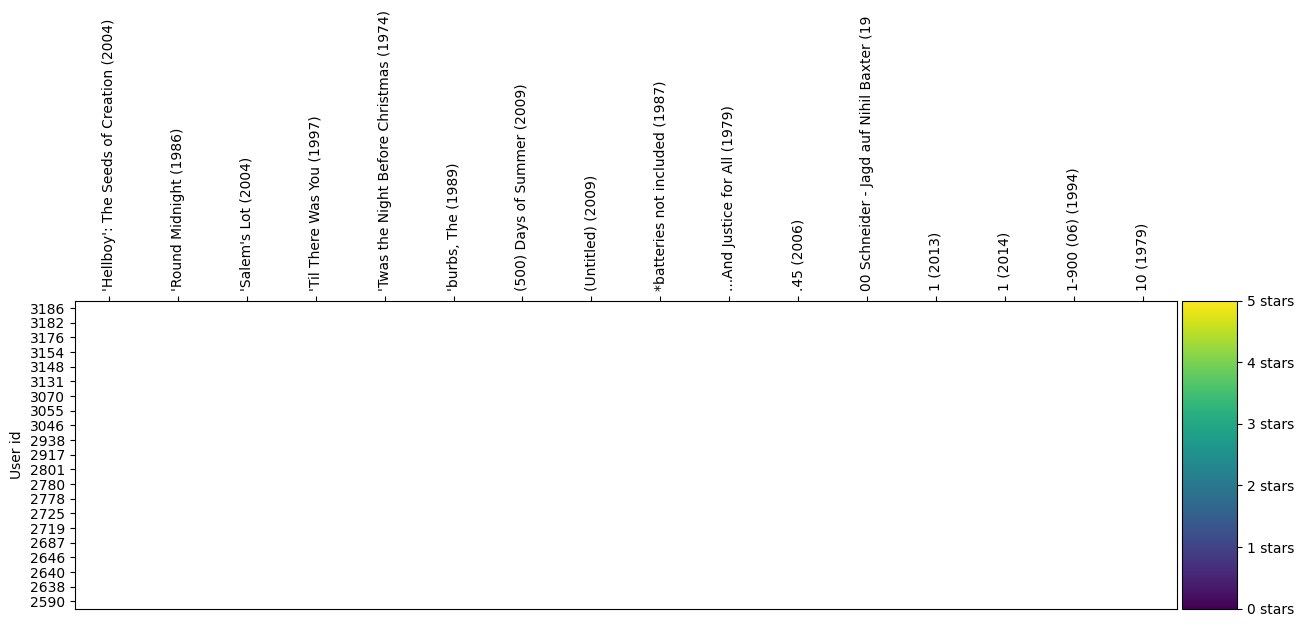

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Define the plotting heatmap function
def draw_movies_heatmap(most_rated_movies_users_selection, axis_labels=True):
    fig = plt.figure(figsize=(15,4))
    ax = plt.gca()
    
    # Draw heatmap
    heatmap = ax.imshow(most_rated_movies_users_selection,  interpolation='nearest', vmin=0, vmax=5, aspect='auto')

    if axis_labels:
        ax.set_yticks(np.arange(most_rated_movies_users_selection.shape[0]) , minor=False)
        ax.set_xticks(np.arange(most_rated_movies_users_selection.shape[1]) , minor=False)
        ax.invert_yaxis()
        ax.xaxis.tick_top()
        labels = most_rated_movies_users_selection.columns.str[:40]
        ax.set_xticklabels(labels, minor=False)
        ax.set_yticklabels(most_rated_movies_users_selection.index, minor=False)
        plt.setp(ax.get_xticklabels(), rotation=90)
    else:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    ax.grid(False)
    ax.set_ylabel('User id')
    # Separate heatmap from color bar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    # Color bar
    cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
    cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars'])

plt.show()
# Print the heatmap
draw_movies_heatmap(user_movie_ratings.iloc[91:112, 5:21])

In [32]:
user_movie_ratings = pd.DataFrame(user_movie_ratings).fillna(0)

In [33]:
from scipy.sparse import csr_matrix
import scipy

# Conversion to sparse csr matrix
# sparse_ratings = csr_matrix(pd.SparseDataFrame(user_movie_ratings).to_coo())
sparse_ratings = scipy.sparse.csr_matrix(user_movie_ratings.values)
sparse_ratings

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 501990 stored elements and shape (5624, 17273)>

In [34]:
from sklearn.cluster import KMeans

# 100 clusters gave a lot of single items in one cluster
predictions = KMeans(n_clusters=50, algorithm='lloyd').fit_predict(sparse_ratings)

In [35]:
# cluster and print some of them
clustered = pd.concat([user_movie_ratings.reset_index(), pd.DataFrame({'group':predictions})], axis=1)

In [36]:
clustered.head()

,userId,"""Great Performances"" Cats (1998)",#FollowMe (2019),#realityhigh (2017),$9.99 (2008),'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),...,Ограбление по... (1978),Одиноким предоставляется общежитие (1983),Пес Барбос и необычный кросс (1961),Поздняя встреча (1979),Приключения Домовёнка (1986),Проклятие (2012),Терем-теремок (1971),Цветик-семицветик (1948),Я худею (2018),group
0,107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16
1,120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
2,125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
3,177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16
4,318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12


In [37]:
group_df = clustered.copy()
group_matrix = scipy.sparse.csr_matrix(group_df.values)
group_cluster_preds = KMeans(n_clusters=20, algorithm='lloyd').fit_predict(group_matrix)
group_clusters = pd.concat([group_df.reset_index(), pd.DataFrame({'group_group':group_cluster_preds})], axis=1)

In [38]:
otp = 'output/exp-3/'
name = '/clusters.csv'
clustered.to_csv(otp + dataset + name, index=False)

In [39]:
otp = 'output/exp-3/'
name = '/group_clusters.csv'
group_clusters.to_csv(otp + dataset + name, index=False)

OPTIONAL STEP// ADDED BY CLARITA, BECAUSE EXP3 EXPECTS COLUMNS THAT CAN ONLY BE GENERATED BY OTHER CLUSTERING METHODS
AND OTHER CLUSTERING METHODS TAKE INTO CONSIDERATION USER FILE, WHICH WE DONT HAVE IN 25M OF MOVIE LENS

In [40]:
from sklearn.metrics import silhouette_samples

In [41]:
group_clusters.head()

,index,userId,"""Great Performances"" Cats (1998)",#FollowMe (2019),#realityhigh (2017),$9.99 (2008),'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),...,Одиноким предоставляется общежитие (1983),Пес Барбос и необычный кросс (1961),Поздняя встреча (1979),Приключения Домовёнка (1986),Проклятие (2012),Терем-теремок (1971),Цветик-семицветик (1948),Я худею (2018),group,group_group
0,0,107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16,12
1,1,120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,12
2,2,125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,12
3,3,177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16,12
4,4,318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,12


In [42]:
data_for_exp3 = ratings_title.copy()
#.drop(columns = ['user_cat','rating_group','title','genres','item_cat','user_group'])


In [43]:
# Step 2: Calculate Silhouette Coefficient for each sample
cluster_shc = silhouette_samples(group_matrix, group_cluster_preds)


In [44]:
os.getcwd()

'C:\\Users\\clari\\Desktop\\M2 - Thesis\\Research\\Dr Jacques Bou Abdo\\Recommender System\\5 - Ensemble Learning Model\\Accuracy Metrics\\serendipity-main'

In [45]:
clustered

,userId,"""Great Performances"" Cats (1998)",#FollowMe (2019),#realityhigh (2017),$9.99 (2008),'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),...,Ограбление по... (1978),Одиноким предоставляется общежитие (1983),Пес Барбос и необычный кросс (1961),Поздняя встреча (1979),Приключения Домовёнка (1986),Проклятие (2012),Терем-теремок (1971),Цветик-семицветик (1948),Я худею (2018),group
0,107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16
1,120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
2,125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
3,177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16
4,318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5619,162375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5620,162380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
5621,162447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16
5622,162476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16


In [46]:
output_df = clustered.copy()
output_df['cluster_shc'] = cluster_shc
columns_to_keep = ['userId', 'cluster_shc', 'group']

# Drop all columns except the specified ones
output_df = output_df[columns_to_keep].rename(columns = {'group' : 'group_clusters'})
# Output as DataFrames
#output_df = pd.DataFrame({'group_cluster': group_cluster_preds, 'cluster_shc': cluster_shc})

# Save to CSV if needed
otp = 'output/exp-3/'
name = '/means_output_clusters_CH.csv'
output_df.to_csv(otp + dataset + name, index=False)

print("Clustering completed. The results are saved in 'means_output_clusters_CH.csv'.")

Clustering completed. The results are saved in 'means_output_clusters_CH.csv'.
